<a href="https://colab.research.google.com/github/ChavezData/NFL_Game_Outcomes/blob/main/NFl_Outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Game Outcomes and Weather Conditions Analysis

This notebook explores the fascinating interplay between weather conditions and the outcomes of NFL games. Using the `spreadspoke_scores.csv` dataset, which contains a wealth of information about NFL games, including scores and detailed weather data, we aim to uncover potential relationships and patterns.

The dataset provides insights into various aspects of each game, such as the date, season, week, teams involved, final scores, betting information (spreads and over/under lines), stadium details, and crucial weather parameters like temperature, wind speed, humidity, and a general description of the weather.

Understanding how weather influences game outcomes can be valuable for various reasons, including sports analytics, betting strategies, and even team preparation. For instance, extreme temperatures, strong winds, or precipitation could significantly impact gameplay, affecting everything from passing accuracy and running game effectiveness to player performance and overall scoring.

Throughout this notebook, we will perform a comprehensive analysis that includes:

1.  **Data Loading and Inspection**: Loading the dataset and examining its structure, contents, and identifying any initial data quality issues, such as missing values.
2.  **Data Cleaning and Preparation**: Addressing missing values in weather-related columns through appropriate imputation or removal techniques to ensure the data is suitable for analysis.
3.  **Feature Engineering**: Creating new, potentially more informative features from the existing weather data to better capture the nuances of different weather conditions.
4.  **Exploratory Data Analysis**: Visualizing the relationships between various weather parameters and game scores (home and away scores, as well as score differences and totals) using various plots.
5.  **Correlation Analysis**: Quantifying the linear relationships between numerical weather variables and scores.
6.  **Statistical Analysis**: Conducting statistical tests to determine if the observed relationships between weather categories and scores are statistically significant.
7.  **Summarizing Findings**: Consolidating the key insights gained from the analysis to draw conclusions about the impact of weather on NFL game outcomes.

By the end of this analysis, we hope to shed light on the extent to which weather conditions play a role in shaping NFL game results and identify which specific weather factors, if any, have a statistically significant impact.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scores = pd.read_csv('spreadspoke_scores.csv')
scores.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
5,9/10/1966,1966,2,False,Houston Oilers,31,0,Oakland Raiders,NaN,NaN,NaN,Rice Stadium,False,77.0,6.0,82.0,NaN
6,9/10/1966,1966,2,False,San Diego Chargers,24,0,New England Patriots,NaN,NaN,NaN,Balboa Stadium,False,69.0,9.0,81.0,NaN
7,9/11/1966,1966,1,False,Atlanta Falcons,14,19,Los Angeles Rams,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,71.0,7.0,57.0,NaN
8,9/11/1966,1966,2,False,Buffalo Bills,20,42,Kansas City Chiefs,NaN,NaN,NaN,War Memorial Stadium,False,63.0,11.0,73.0,NaN
9,9/11/1966,1966,1,False,Detroit Lions,14,3,Chicago Bears,NaN,NaN,NaN,Tiger Stadium,False,67.0,7.0,73.0,NaN


In [ ]:
# Check for missing values in the 'scores' DataFrame
missing_values = scores.isnull().sum()

# Display the number of missing values per column
print("Missing values per column in 'scores' DataFrame:")
display(missing_values)

Missing values per column in 'scores' DataFrame:


,0
schedule_date,0
schedule_season,0
schedule_week,0
schedule_playoff,0
team_home,0
score_home,0
score_away,0
team_away,0
team_favorite_id,2479
spread_favorite,2479


In [ ]:
# Impute missing values in 'weather_humidity' with the median
median_humidity = scores['weather_humidity'].median()
scores['weather_humidity'] = scores['weather_humidity'].fillna(median_humidity)

# Verify that there are no missing values in 'weather_humidity'
print("Missing values in 'weather_humidity' after imputation:")
display(scores['weather_humidity'].isnull().sum())

Missing values in 'weather_humidity' after imputation:


np.int64(0)

# Task
Analyze the relationships between weather conditions and scores in the 'scores' DataFrame.

## Handle missing weather data

### Subtask:
Address the remaining missing values in the weather-related columns (`weather_temperature`, `weather_wind_mph`, and `weather_detail`) using appropriate imputation or removal strategies.


**Reasoning**:
Impute missing values in 'weather_temperature' and 'weather_wind_mph' with their medians and drop rows with missing 'weather_detail', then verify the missing values.



In [ ]:
# Impute missing values in 'weather_temperature' with the median
median_temperature = scores['weather_temperature'].median()
scores['weather_temperature'] = scores['weather_temperature'].fillna(median_temperature)

# Impute missing values in 'weather_wind_mph' with the median
median_wind_mph = scores['weather_wind_mph'].median()
scores['weather_wind_mph'] = scores['weather_wind_mph'].fillna(median_wind_mph)

# Remove rows where 'weather_detail' is missing
scores.dropna(subset=['weather_detail'], inplace=True)

# Verify that there are no missing values remaining in the specified columns
print("Missing values after imputation and removal:")
display(scores[['weather_temperature', 'weather_wind_mph', 'weather_detail']].isnull().sum())

Missing values after imputation and removal:


,0
weather_temperature,0
weather_wind_mph,0
weather_detail,0


## Feature engineering (optional)

### Subtask:
Create new features from existing weather data that might be more relevant for analysis (e.g., temperature categories, wind speed categories).


**Reasoning**:
Create new features for temperature category, wind speed category, and rain/snow indicator based on existing weather columns.



In [ ]:
# Create temperature categories
scores['temperature_category'] = pd.cut(scores['weather_temperature'],
                                        bins=[-np.inf, 32, 60, 80, np.inf],
                                        labels=['freezing', 'cold', 'mild', 'hot'])

# Create wind speed categories
scores['wind_speed_category'] = pd.cut(scores['weather_wind_mph'],
                                       bins=[-np.inf, 5, 15, np.inf],
                                       labels=['low', 'moderate', 'high'])

# Create rain/snow indicator
scores['is_rain_snow'] = scores['weather_detail'].str.contains('rain|snow', na=False)

# Display the first few rows with the new features
display(scores[['weather_temperature', 'temperature_category', 'weather_wind_mph', 'wind_speed_category', 'weather_detail', 'is_rain_snow']].head())

,weather_temperature,temperature_category,weather_wind_mph,wind_speed_category,weather_detail,is_rain_snow
353,72.0,mild,0.0,low,indoor,False
385,72.0,mild,0.0,low,indoor,False
398,72.0,mild,0.0,low,indoor,False
422,72.0,mild,0.0,low,indoor,False
475,72.0,mild,0.0,low,indoor,False


## Explore correlations

### Subtask:
Calculate and visualize the correlations between weather variables and scores (`score_home`, `score_away`).


**Reasoning**:
Calculate and visualize the correlation matrix between the selected numerical weather variables and scores.



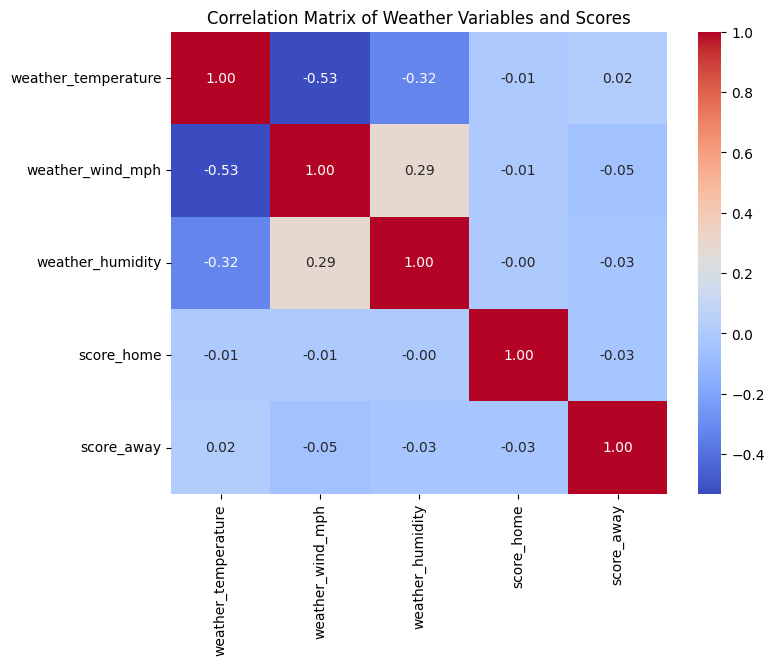

In [ ]:
# Select the relevant columns for correlation analysis
correlation_columns = scores[['weather_temperature', 'weather_wind_mph', 'weather_humidity', 'score_home', 'score_away']]

# Calculate the correlation matrix
correlation_matrix = correlation_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Weather Variables and Scores")
plt.show()

## Visualize relationships

### Subtask:
Create plots (e.g., scatter plots, box plots) to visualize the relationships between specific weather conditions and score differences or totals.


**Reasoning**:
Calculate the score difference and total score, then create box plots to visualize the relationships between weather categories and scores.



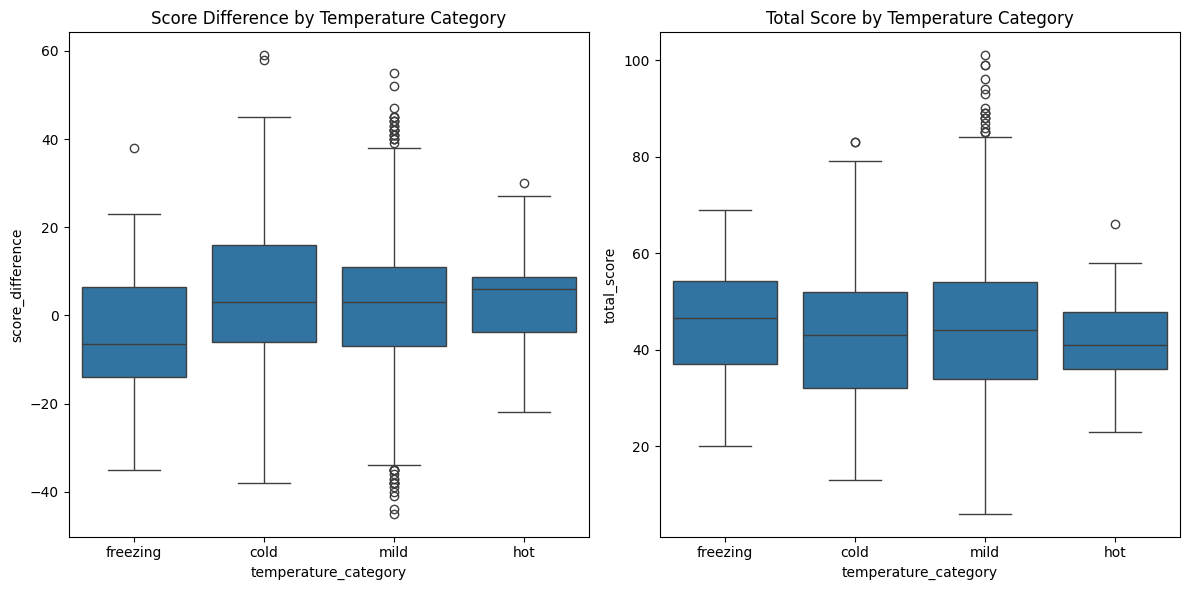

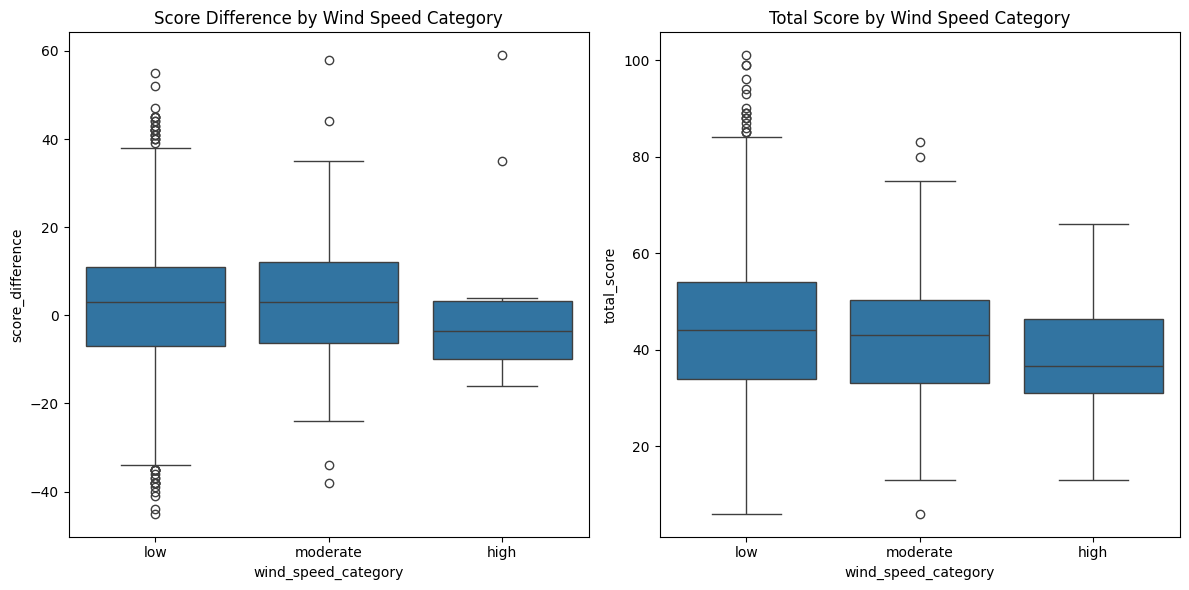

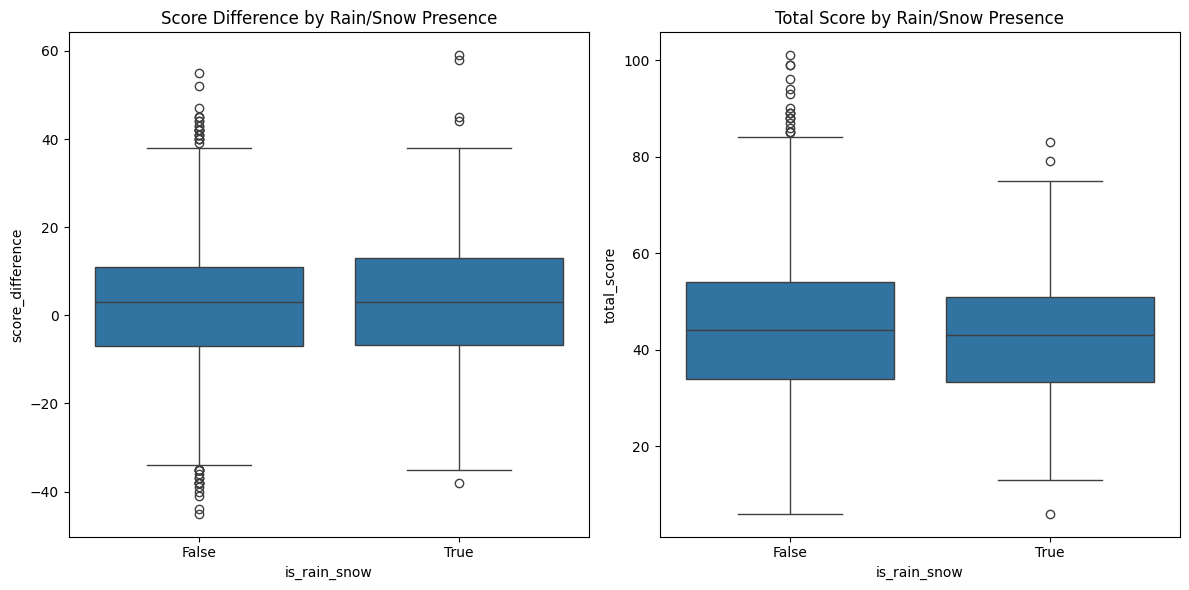

In [ ]:
# Calculate score difference and total score
scores['score_difference'] = scores['score_home'] - scores['score_away']
scores['total_score'] = scores['score_home'] + scores['score_away']

# Create box plots for temperature categories
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='temperature_category', y='score_difference', data=scores)
plt.title('Score Difference by Temperature Category')

plt.subplot(1, 2, 2)
sns.boxplot(x='temperature_category', y='total_score', data=scores)
plt.title('Total Score by Temperature Category')
plt.tight_layout()
plt.show()

# Create box plots for wind speed categories
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='wind_speed_category', y='score_difference', data=scores)
plt.title('Score Difference by Wind Speed Category')

plt.subplot(1, 2, 2)
sns.boxplot(x='wind_speed_category', y='total_score', data=scores)
plt.title('Total Score by Wind Speed Category')
plt.tight_layout()
plt.show()

# Create box plots for rain/snow
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='is_rain_snow', y='score_difference', data=scores)
plt.title('Score Difference by Rain/Snow Presence')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_rain_snow', y='total_score', data=scores)
plt.title('Total Score by Rain/Snow Presence')
plt.tight_layout()
plt.show()

## Statistical analysis (optional)

### Subtask:
Conduct statistical tests to determine if weather conditions have a significant impact on scores.


**Reasoning**:
Perform ANOVA tests and independent samples t-tests to determine the statistical significance of the impact of weather conditions on scores.



In [ ]:
from scipy import stats

# ANOVA for temperature categories
temp_categories = scores['temperature_category'].unique()
temp_score_diff_groups = [scores['score_difference'][scores['temperature_category'] == cat] for cat in temp_categories]
temp_total_score_groups = [scores['total_score'][scores['temperature_category'] == cat] for cat in temp_categories]

anova_temp_diff = stats.f_oneway(*temp_score_diff_groups)
anova_temp_total = stats.f_oneway(*temp_total_score_groups)

print(f"ANOVA for Score Difference by Temperature Category: F-statistic={anova_temp_diff.statistic:.2f}, p-value={anova_temp_diff.pvalue:.4f}")
print(f"ANOVA for Total Score by Temperature Category: F-statistic={anova_temp_total.statistic:.2f}, p-value={anova_temp_total.pvalue:.4f}")
print("-" * 50)

# ANOVA for wind speed categories
wind_categories = scores['wind_speed_category'].unique()
wind_score_diff_groups = [scores['score_difference'][scores['wind_speed_category'] == cat] for cat in wind_categories]
wind_total_score_groups = [scores['total_score'][scores['wind_speed_category'] == cat] for cat in wind_categories]

anova_wind_diff = stats.f_oneway(*wind_score_diff_groups)
anova_wind_total = stats.f_oneway(*wind_total_score_groups)

print(f"ANOVA for Score Difference by Wind Speed Category: F-statistic={anova_wind_diff.statistic:.2f}, p-value={anova_wind_diff.pvalue:.4f}")
print(f"ANOVA for Total Score by Wind Speed Category: F-statistic={anova_wind_total.statistic:.2f}, p-value={anova_wind_total.pvalue:.4f}")
print("-" * 50)

# Independent samples t-test for rain/snow
rain_snow_diff = scores['score_difference'][scores['is_rain_snow'] == True]
no_rain_snow_diff = scores['score_difference'][scores['is_rain_snow'] == False]

ttest_rain_snow_diff = stats.ttest_ind(rain_snow_diff, no_rain_snow_diff)

rain_snow_total = scores['total_score'][scores['is_rain_snow'] == True]
no_rain_snow_total = scores['total_score'][scores['is_rain_snow'] == False]

ttest_rain_snow_total = stats.ttest_ind(rain_snow_total, no_rain_snow_total)

print(f"T-test for Score Difference by Rain/Snow Presence: t-statistic={ttest_rain_snow_diff.statistic:.2f}, p-value={ttest_rain_snow_diff.pvalue:.4f}")
print(f"T-test for Total Score by Rain/Snow Presence: t-statistic={ttest_rain_snow_total.statistic:.2f}, p-value={ttest_rain_snow_total.pvalue:.4f}")

ANOVA for Score Difference by Temperature Category: F-statistic=3.17, p-value=0.0233
ANOVA for Total Score by Temperature Category: F-statistic=0.76, p-value=0.5152
--------------------------------------------------
ANOVA for Score Difference by Wind Speed Category: F-statistic=0.87, p-value=0.4195
ANOVA for Total Score by Wind Speed Category: F-statistic=2.62, p-value=0.0731
--------------------------------------------------
T-test for Score Difference by Rain/Snow Presence: t-statistic=1.50, p-value=0.1328
T-test for Total Score by Rain/Snow Presence: t-statistic=-1.89, p-value=0.0593


## Summarize findings

### Subtask:
Present the key findings about the relationships between weather and scores.


## Summary:

### Data Analysis Key Findings

*   Missing values in `weather_temperature` and `weather_wind_mph` were imputed with the median, while rows with missing `weather_detail` were removed.
*   New features, `temperature_category`, `wind_speed_category`, and `is_rain_snow`, were successfully created to categorize weather conditions.
*   Correlation analysis showed weak correlations between the numerical weather variables (`weather_temperature`, `weather_wind_mph`, `weather_humidity`) and scores (`score_home`, `score_away`).
*   Visualizations indicated potential differences in score difference and total score across different weather categories.
*   Statistical tests revealed that **temperature category has a statistically significant impact on the score difference** (p-value = 0.0233).
*   No statistically significant impact was found for temperature category on total score (p-value = 0.5152), wind speed category on score difference (p-value = 0.4195) or total score (p-value = 0.0731), or the presence of rain/snow on score difference (p-value = 0.1328) or total score (p-value = 0.0593) at the 0.05 significance level.

### Insights or Next Steps

*   Further investigate the specific temperature ranges that contribute most significantly to the observed differences in score difference.
*   Explore potential interactions between weather conditions and other factors (e.g., team performance, location) that might influence scores.
